In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
y = digits.target
data = digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

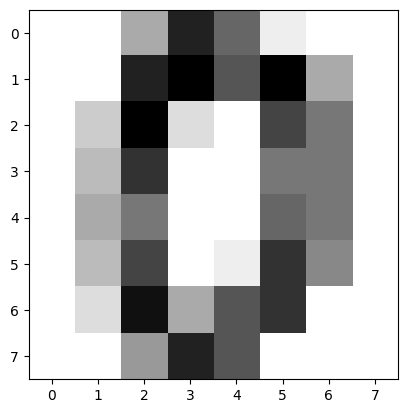

In [4]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

array([ 0.,  0.,  5., ..., 12.,  1.,  0.])

In [23]:
flat_array=[]
for a in data:
    flat=a.flatten()
    data_d = flat.reshape( -1)
    flat_array.append(data_d)
 
X=flat_array
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [27]:
clf = SVC(kernel="linear", decision_function_shape="ovo", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

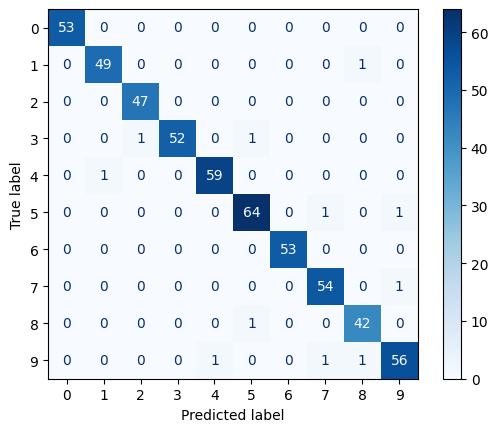

In [28]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)

In [29]:
print(accuracy_score(y_test, y_pred))

0.9796296296296296


In [32]:
###Nepovinný bonus
###Algoritmus u některých obrázků nefungoval, určitě bude zajímavé si tyto obrázky prohlédnout. K tomu je potřeba doplnit následující kód, který vlož do svého programu. Na místa označená 1 a 2 je potřeba doplnit kód. Pokud vše doplníš správně, vytvoří ti program několik obrázků, které obsahují špatně predikované obrázky.
df_vysledek = pd.DataFrame({"text": X_test, "y_test": y_test, "y_pred": y_pred}).reset_index(drop=True)
df_vysledek_incorrect = df_vysledek[df_vysledek["y_test"] != df_vysledek["y_pred"]]
df_vysledek_incorrect

,text,y_test,y_pred
11,"[0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 10.0, 0.0, 0.0...",9,4
133,"[0.0, 0.0, 4.0, 6.0, 11.0, 14.0, 6.0, 0.0, 0.0...",7,9
149,"[0.0, 0.0, 4.0, 12.0, 13.0, 1.0, 0.0, 0.0, 0.0...",3,5
159,"[0.0, 0.0, 6.0, 12.0, 13.0, 6.0, 0.0, 0.0, 0.0...",9,7
222,"[0.0, 0.0, 0.0, 0.0, 13.0, 11.0, 0.0, 0.0, 0.0...",4,1
239,"[0.0, 0.0, 13.0, 14.0, 12.0, 15.0, 4.0, 0.0, 0...",8,5
431,"[0.0, 0.0, 6.0, 11.0, 16.0, 13.0, 5.0, 0.0, 0....",3,2
450,"[0.0, 0.0, 2.0, 15.0, 15.0, 16.0, 11.0, 0.0, 0...",5,7
470,"[0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 1.0, 0.0, 0....",5,9
480,"[0.0, 0.0, 13.0, 14.0, 10.0, 2.0, 0.0, 0.0, 0....",1,8


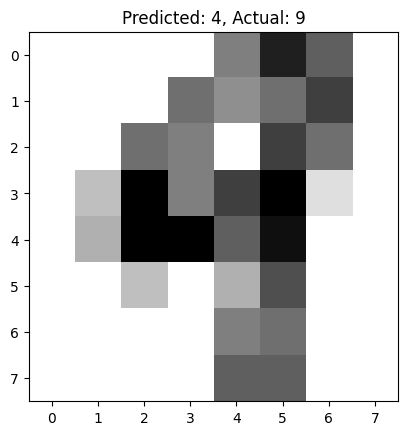

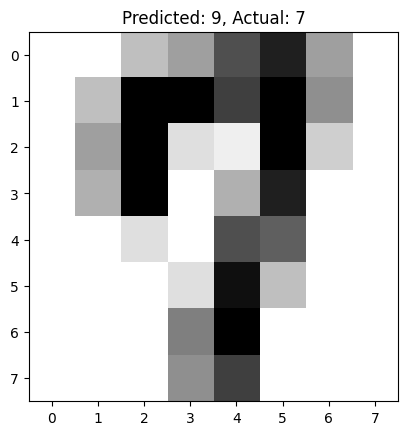

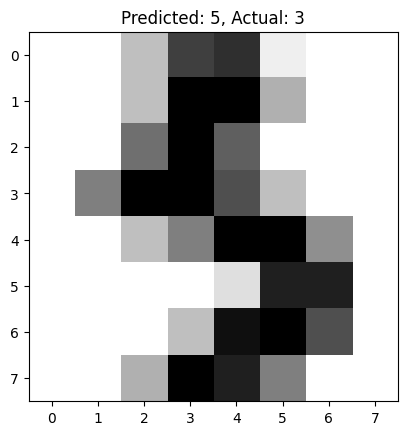

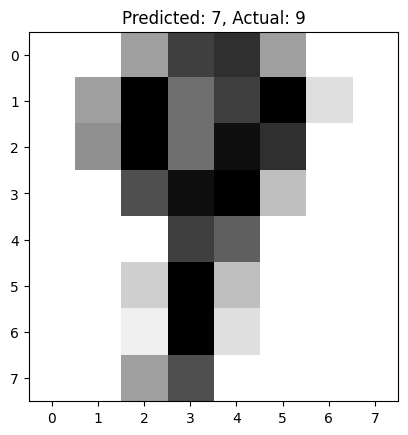

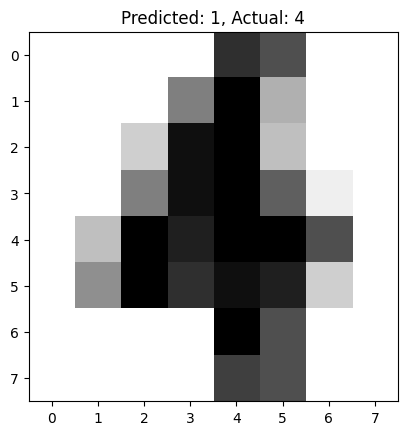

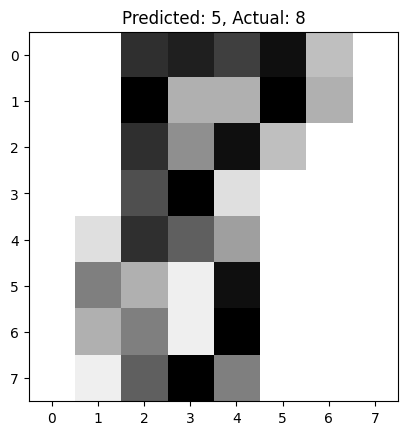

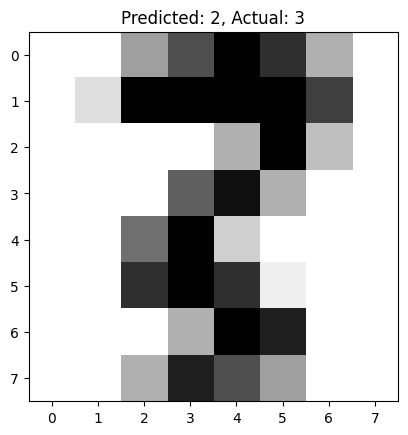

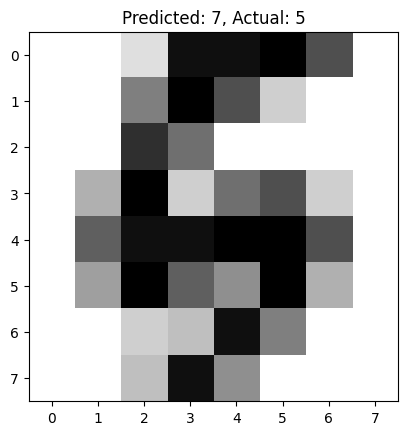

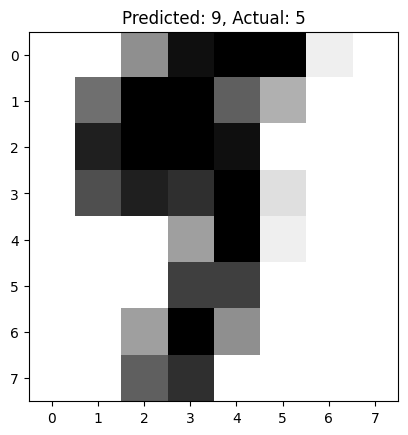

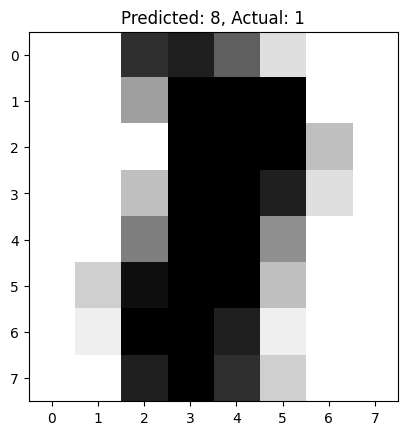

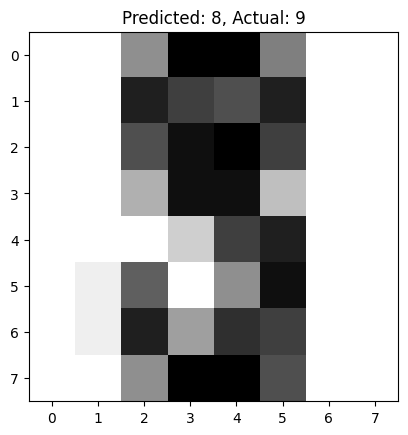

In [36]:
for i in range(0, len(y_pred)):
    if df_vysledek.at[i,"y_test"] != df_vysledek.at[i,"y_pred"]:
        image = df_vysledek.at[i,"text"]
        # Obrázek převedeme zpět na matici 8x8
        image = image.reshape(8, 8)
        # Příkaz na zobrazení obrázku
        plt.imshow(image, cmap=plt.cm.gray_r)
        # Grafu dáme titulek, který porovnává predikovanou a skutečnou hodnotu
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        # Obrázek uložíme do souboru
        plt.savefig(f"{i}.png")
        plt.show()